<a href="https://colab.research.google.com/github/TanisiCurtin/Programming-Assignment-2/blob/main/Business_Report_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Programming Assignment 2
Australian Energy Dataset Analysis
Business Reports

So this is a Business Report Notebook which includes code,analysis and discussion

Lets Setup an Environment:
A New colab notebook alog with new repository at my GitHub Account is created.

Lets connect it to Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Following libraries are imported:

In [2]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Connecting to the SQLite Database

So we've access the database and connected to SQLlite and will examine the schema of the database and understand the structure of the table

In [3]:
db_path='/content/drive/My Drive/AUS_energy_sqlite3.db'
conn = sqlite3.connect(db_path)
#Verifying connection and checking the database schema
cursor=conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('AUS_energy',)]


There is only One Table names AUS_energy

Data Extraction and Manipulation
Example SQL query to load data into a DataFrame

In [4]:
##lets display the Table AUS_energy
table_name='AUS_energy'
query= f"SELECT * FROM {table_name}"
with pd.option_context('display.max_rows',None): ##to display all rows
    df=pd.read_sql_query(query,conn)
print(df)

       Year State Coal (PJ)  Oil (PJ)  Gas (PJ)  Renewables (PJ)  Population  \
0   2008-09    WA     132.9     294.3     474.7             15.6     2240250   
1   2008-09   NSW     800.9     587.5     131.6             54.7     7408540   
2   2008-09   VIC     695.3     432.9     273.5             33.6     5371934   
3   2008-09   QLD     629.2     469.5     187.9             77.4     4328771   
4   2008-09    SA      80.2     120.2     134.0             21.2     1608902   
..      ...   ...       ...       ...       ...              ...         ...   
93  2021-22   VIC     410.7     410.0     237.5            105.2     6625964   
94  2021-22   QLD     485.6     504.7     305.7            143.0     5320496   
95  2021-22    SA      25.9     141.6      80.2             48.3     1821200   
96  2021-22   TAS       8.8      39.9       7.1             48.1      571013   
97  2021-22    NT                37.6     110.6              1.6      250219   

    GSP ($ million)  
0            2446

So there is one Table called AUS_energy with 8 columns Year	State	Coal (PJ)	Oil (PJ)	Gas (PJ)	Renewables (PJ)	Population	GSP ($ million) and over 97 rows with data.

 **Group A:**
1. **Compute and visualize the total energy consumption for each state**

  State  total_energy_consumption
0   NSW                   21199.0
1    NT                    1502.3
2   QLD                   19979.2
3    SA                    4507.4
4   TAS                    1475.0
5   VIC                   19061.5
6    WA                   15457.0


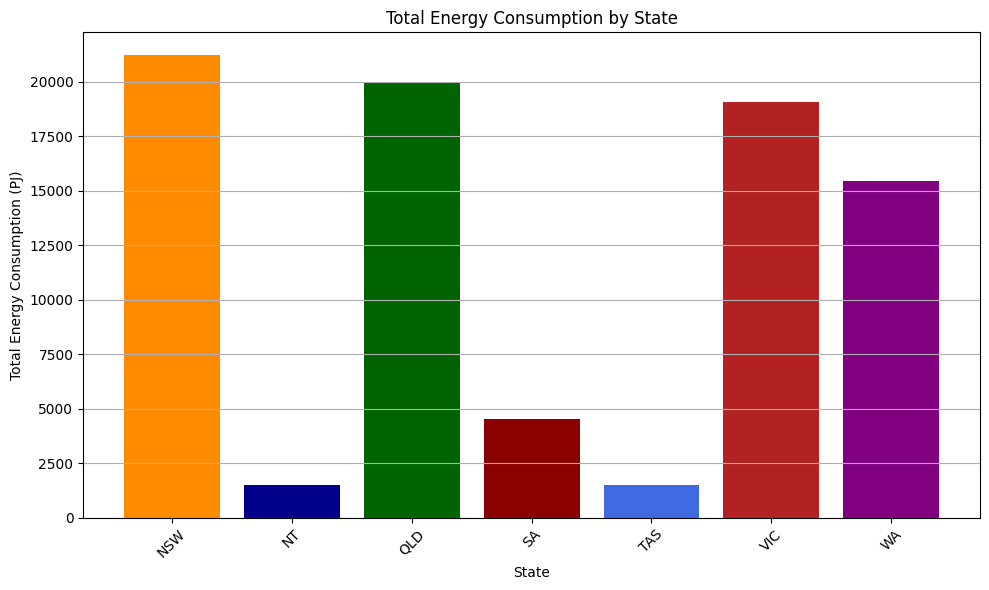

In [5]:
# SQL query to select energy data from the AUS_energy table
sql_query = """
SELECT
    Year,
    State,
    `Coal (PJ)`,
    `Oil (PJ)`,
    `Gas (PJ)`,
    `Renewables (PJ)`
FROM
    AUS_energy;
"""

# Read data from SQL query into a DataFrame
df = pd.read_sql_query(sql_query, conn)
 #preproccessing data- done with the help of Copilot AI
def preprocess_energy_data(df, energy_columns):
    """
    Preprocess the energy data by converting energy columns to numeric values.

    Parameters:
    df (pd.DataFrame): The input data frame containing energy data.
    energy_columns (list): List of energy columns to be converted.

    Returns:
    pd.DataFrame: The processed data frame with numeric energy columns.
    """
    df[energy_columns] = df[energy_columns].apply(pd.to_numeric, errors='coerce')
    return df

# Define the energy columns
energy_columns = ['Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)']

# Preprocess the energy data
df = preprocess_energy_data(df, energy_columns)

# Calculate total energy consumption
df['total_energy_consumption'] = df[energy_columns].sum(axis=1)

# Group by state and sum the total energy consumption
total_cons_by_state = df.groupby('State')['total_energy_consumption'].sum().reset_index()

#Print the table
print(total_cons_by_state)

# Plot the total energy consumption by state ( used Gemini AI to figure out the colors for python)
plt.figure(figsize=(10, 6))
plt.bar(total_cons_by_state['State'], total_cons_by_state['total_energy_consumption'], color=['darkorange', 'darkblue', 'darkgreen', 'darkred', 'royalblue', 'firebrick', 'purple'])
plt.title('Total Energy Consumption by State')
plt.ylabel('Total Energy Consumption (PJ)')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

2. **Compute and visualize the total energy consumption by fuel type**

Coal (PJ)          26946.9
Oil (PJ)           31130.0
Gas (PJ)           20049.6
Renewables (PJ)     5054.9
dtype: float64


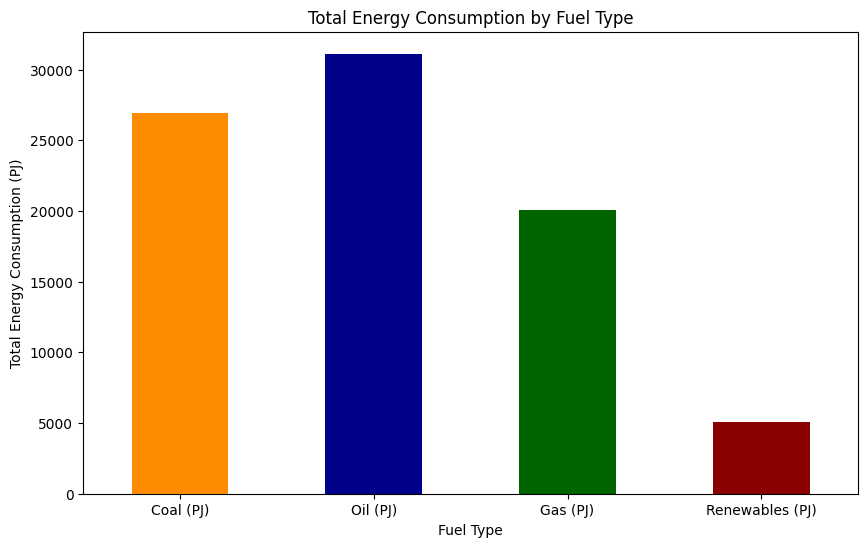

In [8]:
# Query data from the database
query = "SELECT * FROM AUS_energy"
df = pd.read_sql_query(query, conn)

# Preprocess the energy data
df = preprocess_energy_data(df, energy_columns)

# Calculate total energy consumption by fuel type
total_cons_by_fuel = df[energy_columns].sum()

#Print the table
print(total_cons_by_fuel)

# Plot the total energy consumption by fuel type
plt.figure(figsize=(10, 6))
total_cons_by_fuel.plot(kind='bar', color=['darkorange', 'darkblue', 'darkgreen', 'darkred'])
plt.title('Total Energy Consumption by Fuel Type')
plt.ylabel('Total Energy Consumption (PJ)')
plt.xlabel('Fuel Type')
plt.xticks(rotation=0)
plt.show()

3. **Analyse and plot the total energy consumption fuel types for each year.**

         Coal (PJ)  Oil (PJ)  Gas (PJ)  Renewables (PJ)
Year                                                   
2008-09     2350.9    2000.8    1252.8            240.0
2009-10     2224.8    2058.1    1258.0            282.7
2010-11     2123.9    2212.0    1274.2            294.7
2011-12     2074.7    2184.2    1338.6            293.8
2012-13     1930.9    2278.0    1376.5            333.5
2013-14     1845.8    2297.2    1383.8            344.4
2014-15     1907.2    2236.7    1407.0            347.6
2015-16     1954.8    2279.5    1440.3            360.2
2016-17     1930.1    2318.0    1477.7            379.1
2017-18     1847.3    2404.0    1534.5            382.5
2018-19     1801.7    2424.5    1561.9            400.3
2019-20     1706.7    2251.5    1623.8            418.7
2020-21     1661.4    2082.0    1561.0            464.6
2021-22     1586.7    2103.5    1559.5            512.8


<Figure size 1000x600 with 0 Axes>

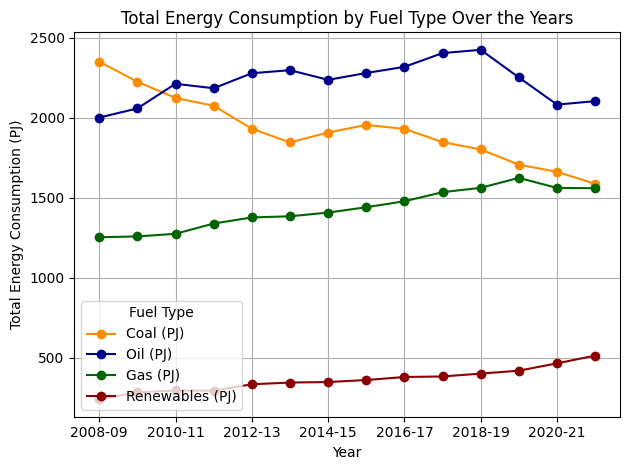

In [ ]:
# Preprocess the energy data
df = preprocess_energy_data(df, energy_columns)

# Group by year and sum the energy consumption for each fuel type
total_energy_by_yr = df.groupby('Year')[energy_columns].sum()

#Print the table
print(total_energy_by_yr)

# Plot the total energy consumption for each fuel type over the years
plt.figure(figsize=(10, 6))
total_energy_by_yr.plot(kind='line', marker='o', color=['darkorange', 'darkblue', 'darkgreen', 'darkred'])
plt.title('Total Energy Consumption by Fuel Type Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Energy Consumption (PJ)')
plt.grid(True)
plt.legend(title='Fuel Type')
plt.tight_layout()
plt.show()

4. **Analyse and visualize the total energy consumption for each state for each year**

State       NSW     NT     QLD     SA    TAS     VIC      WA
Year                                                        
2008-09  1574.7   95.1  1364.0  355.6  102.3  1435.3   917.5
2009-10  1623.2   94.4  1317.6  340.1  106.6  1436.6   905.1
2010-11  1632.3   99.5  1269.8  337.5  110.1  1473.3   982.3
2011-12  1593.3   98.2  1332.1  300.2  103.0  1479.6   984.9
2012-13  1548.7  100.0  1342.1  347.8  116.7  1442.0  1021.6
2013-14  1509.9   99.2  1341.7  326.9  115.8  1411.1  1066.6
2014-15  1443.7   83.9  1458.2  347.6   97.1  1422.6  1045.4
2015-16  1501.7   83.9  1477.1  306.0  101.6  1440.6  1123.9
2016-17  1506.6   83.3  1547.0  274.2  102.8  1414.0  1177.0
2017-18  1539.8   90.2  1572.6  332.6  108.4  1315.0  1209.7
2018-19  1534.9  133.0  1549.4  322.4  107.5  1279.9  1261.3
2019-20  1455.5  146.5  1508.1  315.3  100.4  1210.1  1264.8
2020-21  1382.2  145.3  1460.5  305.2   98.8  1138.0  1239.0
2021-22  1352.5  149.8  1439.0  296.0  103.9  1163.4  1257.9


<Figure size 1400x800 with 0 Axes>

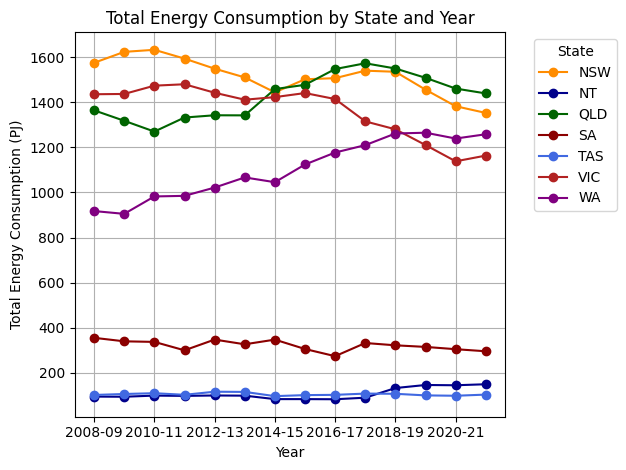

In [ ]:
# Preprocess the energy data
df = preprocess_energy_data(df, energy_columns)

# Calculate total energy consumption for each row
df['Total Energy Consumption(PJ)']=df[energy_columns].sum(axis=1)

#Group by year, state and then sum the total energy consumption (used copilot ai to fix error with .unstack() )
total_energy_by_state_yr = df.groupby(['Year', 'State'])['Total Energy Consumption(PJ)'].sum().unstack()

#Print the table
print(total_energy_by_state_yr)

#Plot the total energy consumption group by state and years
plt.figure(figsize=(14, 8))
total_energy_by_state_yr.plot(kind='line', marker='o',color=['darkorange', 'darkblue', 'darkgreen', 'darkred','royalblue','firebrick','purple'])
plt.title('Total Energy Consumption by State and Year')
plt.xlabel('Year')
plt.ylabel('Total Energy Consumption (PJ)')
plt.grid(True)
plt.legend(title='State',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Group B:**
5. **Analyse and visualise the total energy consumption for each state, broken down by fuel
type.**

  State  Coal (PJ)  Oil (PJ)  Gas (PJ)  Renewables (PJ)
0   NSW     9076.7    8902.4    2071.5           1148.4
1    NT        0.0     628.7     862.0             11.6
2   QLD     7259.9    7338.6    3747.1           1633.6
3    SA      651.7    1857.7    1549.7            448.3
4   TAS      143.3     545.7     167.8            618.2
5   VIC     8007.5    6580.6    3608.3            865.1
6    WA     1807.8    5276.3    8043.2            329.7


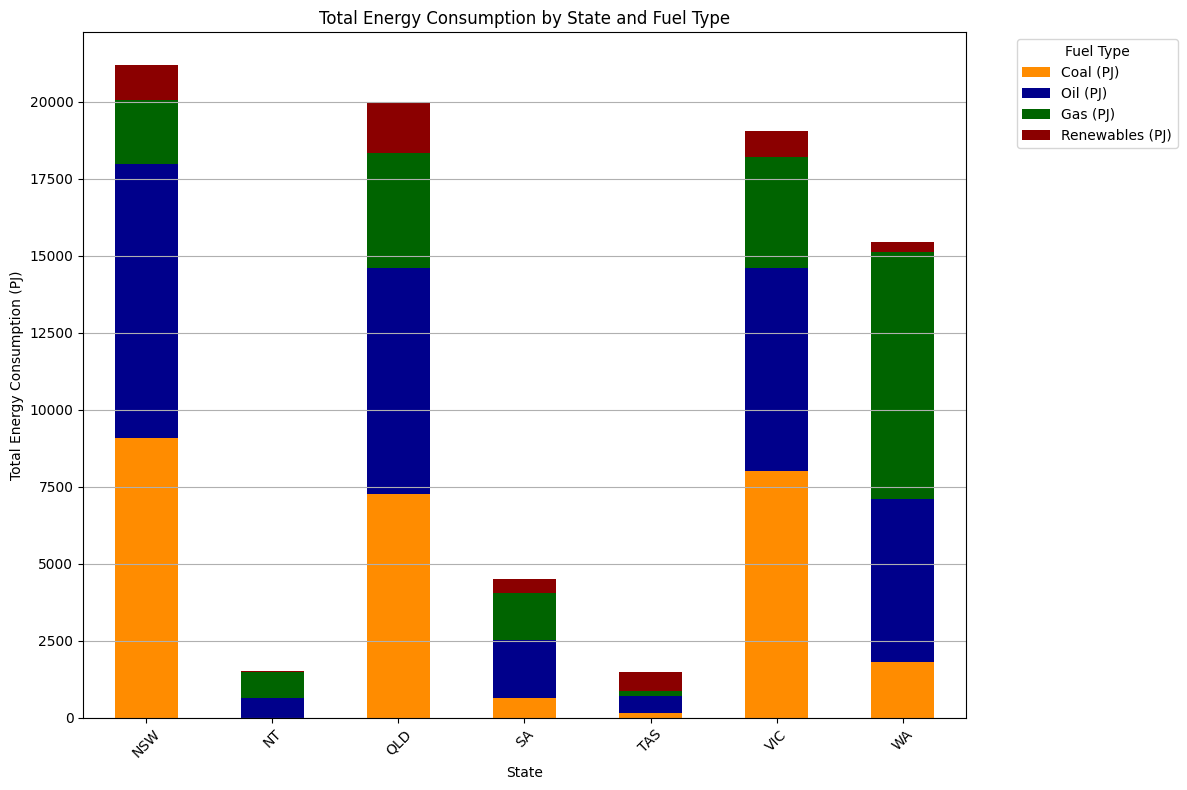

In [ ]:
# Preprocess the energy data
df = preprocess_energy_data(df, energy_columns)

#Groups by state and sum the total energy consumption for each fuel type( used copilot AI to fix index error with .reset_index())
total_consumption_by_fuel_type = df.groupby('State')[energy_columns].sum().reset_index()

# Print the table
print(total_consumption_by_fuel_type)

# Plot the total energy consumption by state, broken down by fuel type
total_consumption_by_fuel_type.set_index('State', inplace=True)
total_consumption_by_fuel_type.plot(kind='bar', stacked=True, figsize=(12, 8),
                                    color=['darkorange', 'darkblue', 'darkgreen', 'darkred'])

plt.title('Total Energy Consumption by State and Fuel Type')
plt.ylabel('Total Energy Consumption (PJ)')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y')

# Show the plot
plt.show()

6. **Analyse the per capita energy consumption for each state for each year and create a
corresponding visualization.**

State         NSW        NT       QLD        SA       TAS       VIC        WA
Year                                                                         
2008-09  0.000213  0.000421  0.000315  0.000221  0.000203  0.000267  0.000410
2009-10  0.000216  0.000411  0.000299  0.000209  0.000209  0.000263  0.000395
2010-11  0.000215  0.000430  0.000284  0.000206  0.000215  0.000266  0.000417
2011-12  0.000207  0.000416  0.000292  0.000181  0.000201  0.000262  0.000406
2012-13  0.000199  0.000414  0.000288  0.000208  0.000228  0.000250  0.000411
2013-14  0.000191  0.000408  0.000284  0.000194  0.000225  0.000239  0.000424
2014-15  0.000180  0.000343  0.000305  0.000204  0.000189  0.000236  0.000411
2015-16  0.000185  0.000342  0.000305  0.000179  0.000196  0.000233  0.000440
2016-17  0.000182  0.000337  0.000314  0.000159  0.000195  0.000224  0.000455
2017-18  0.000184  0.000365  0.000314  0.000190  0.000202  0.000205  0.000462
2018-19  0.000181  0.000539  0.000304  0.000182  0.000196  0.000

<Figure size 1800x900 with 0 Axes>

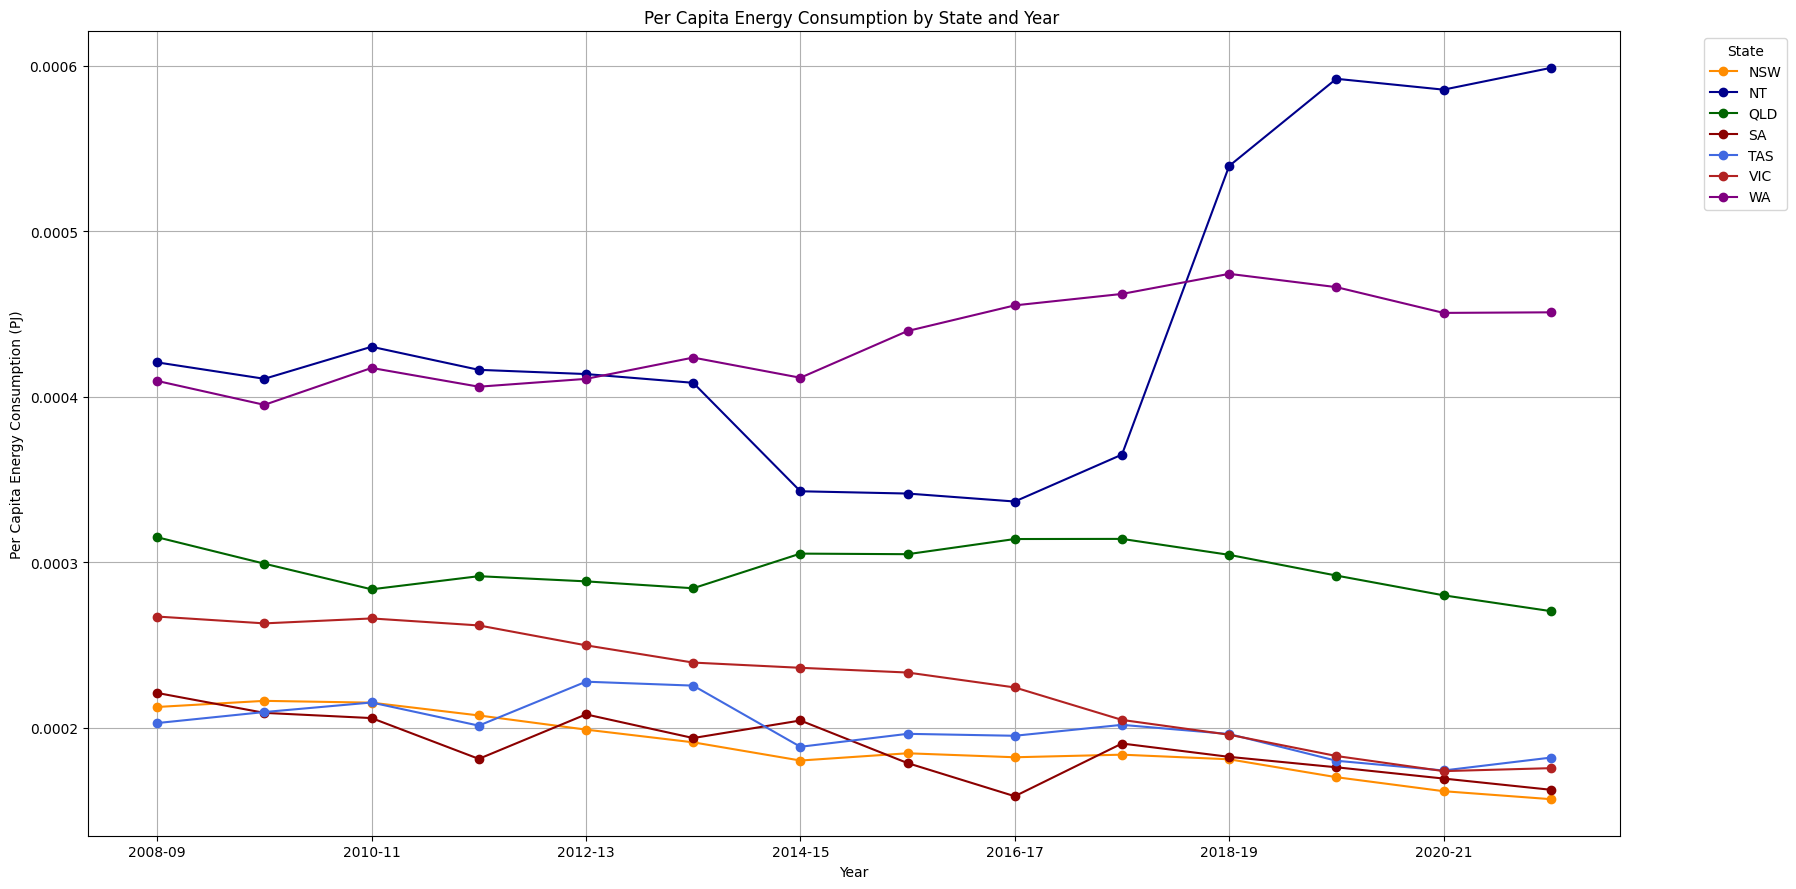

In [ ]:
#Calculate total energy consumption for each row
df['Total Energy Consumption(PJ)']=df[energy_columns].sum(axis=1)

#Calculate per capita energy consumption for each row
df['Per Capita Energy Consumption(PJ)']=df['Total Energy Consumption(PJ)']/df['Population']

#Group by year,state and then sum it up with per capita energy consumption
per_capita_cons_by_state_yr = df.groupby(['Year', 'State'])['Per Capita Energy Consumption(PJ)'].sum().unstack()

#Print the Table
print(per_capita_cons_by_state_yr)

#plot the per capita energy consumption by state and year
plt.figure(figsize=(18, 9))
per_capita_cons_by_state_yr.plot(kind='line', marker='o',figsize=(18,9),color=['darkorange', 'darkblue', 'darkgreen', 'darkred','royalblue','firebrick','purple'])

plt.title('Per Capita Energy Consumption by State and Year ')
plt.xlabel('Year')
plt.ylabel('Per Capita Energy Consumption (PJ)')
plt.grid(True)
plt.legend(title='State',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

7. **Determine energy productivity, defined as Gross State Product (GSP) per unit of energy
consumed, for each state annually and visualize the results.**

<Figure size 1800x900 with 0 Axes>

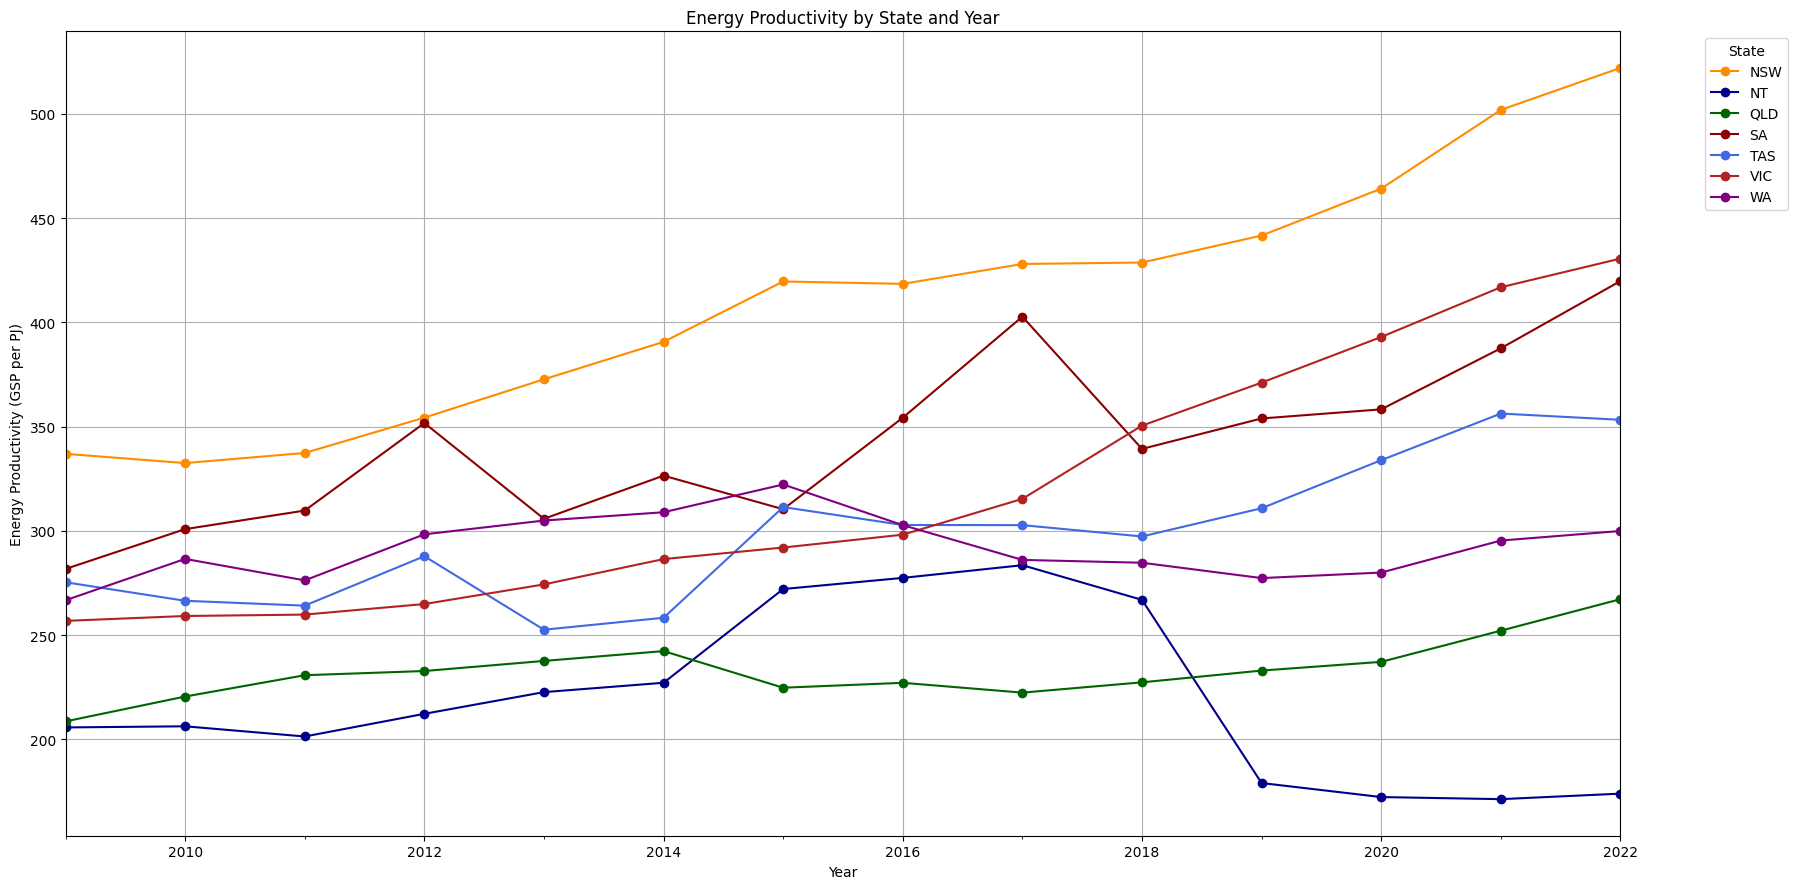

In [ ]:
# SQL query to calculate energy productivity
query = """
SELECT
    Year,
    State,
    `GSP ($ million)` / (`Coal (PJ)` + `Oil (PJ)` + `Gas (PJ)` + `Renewables (PJ)`) AS Energy_Productivity
FROM
    AUS_energy
"""

# Execute the query and load the result into a DataFrame
energy_prod_df = pd.read_sql_query(query, conn)

# Convert the Year column to a datetime format for better plotting
energy_prod_df['Year'] = pd.to_datetime(energy_prod_df['Year'], format='%Y-%y')

# Plot the energy productivity over years for each state (used copilot ai to figure out accurate figsize for this plot )
plt.figure(figsize=(18, 9))
energy_prod_df.pivot_table(index='Year', columns='State', values='Energy_Productivity').plot(kind='line', marker='o', figsize=(18, 9), color=['darkorange', 'darkblue', 'darkgreen', 'darkred', 'royalblue', 'firebrick', 'purple'])
plt.title('Energy Productivity by State and Year')
plt.xlabel('Year')
plt.ylabel('Energy Productivity (GSP per PJ)')
plt.grid(True)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**GROUP C:**
8. **Analyse the energy intensity, defined as energy consumption per unit of GSP, for each
state annually and chart these figures.**

<Figure size 1800x900 with 0 Axes>

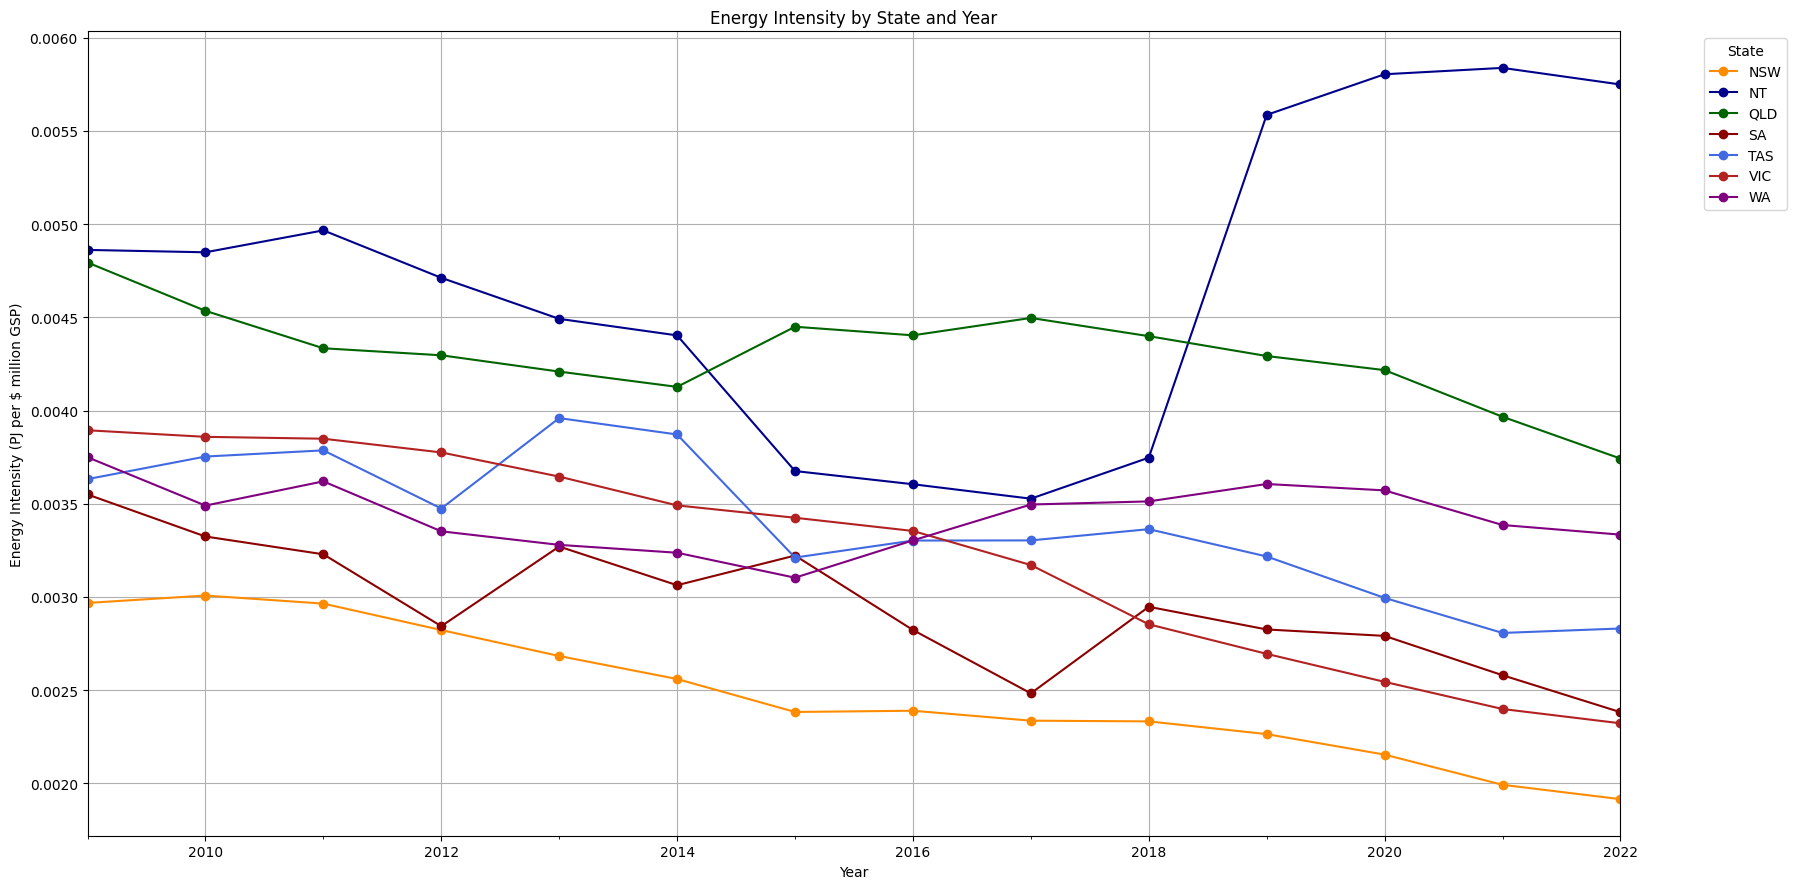

In [ ]:
# SQL query to calculate energy intensity(used gemini ai to complete the query)
query = """
SELECT
    Year,
    State,
    (`Coal (PJ)` + `Oil (PJ)` + `Gas (PJ)` + `Renewables (PJ)`) / `GSP ($ million)` AS Energy_Intensity
FROM
    AUS_energy
"""

# Execute the query and load the result into a DataFrame
energy_intensity_df = pd.read_sql_query(query, conn)

# Convert the Year column to a datetime format for better plotting
energy_intensity_df['Year'] = pd.to_datetime(energy_intensity_df['Year'], format='%Y-%y')

# Plot the energy intensity over years for each state
plt.figure(figsize=(18, 9))
energy_intensity_df.pivot_table(index='Year', columns='State', values='Energy_Intensity').plot(kind='line', marker='o', figsize=(18, 9), color=['darkorange', 'darkblue', 'darkgreen', 'darkred', 'royalblue', 'firebrick', 'purple'])
plt.title('Energy Intensity by State and Year')
plt.xlabel('Year')
plt.ylabel('Energy Intensity (PJ per $ million GSP)')
plt.grid(True)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


9. **Analyse and compare the growth rate of the GSP and the consumption of renewable
energy for each state.**

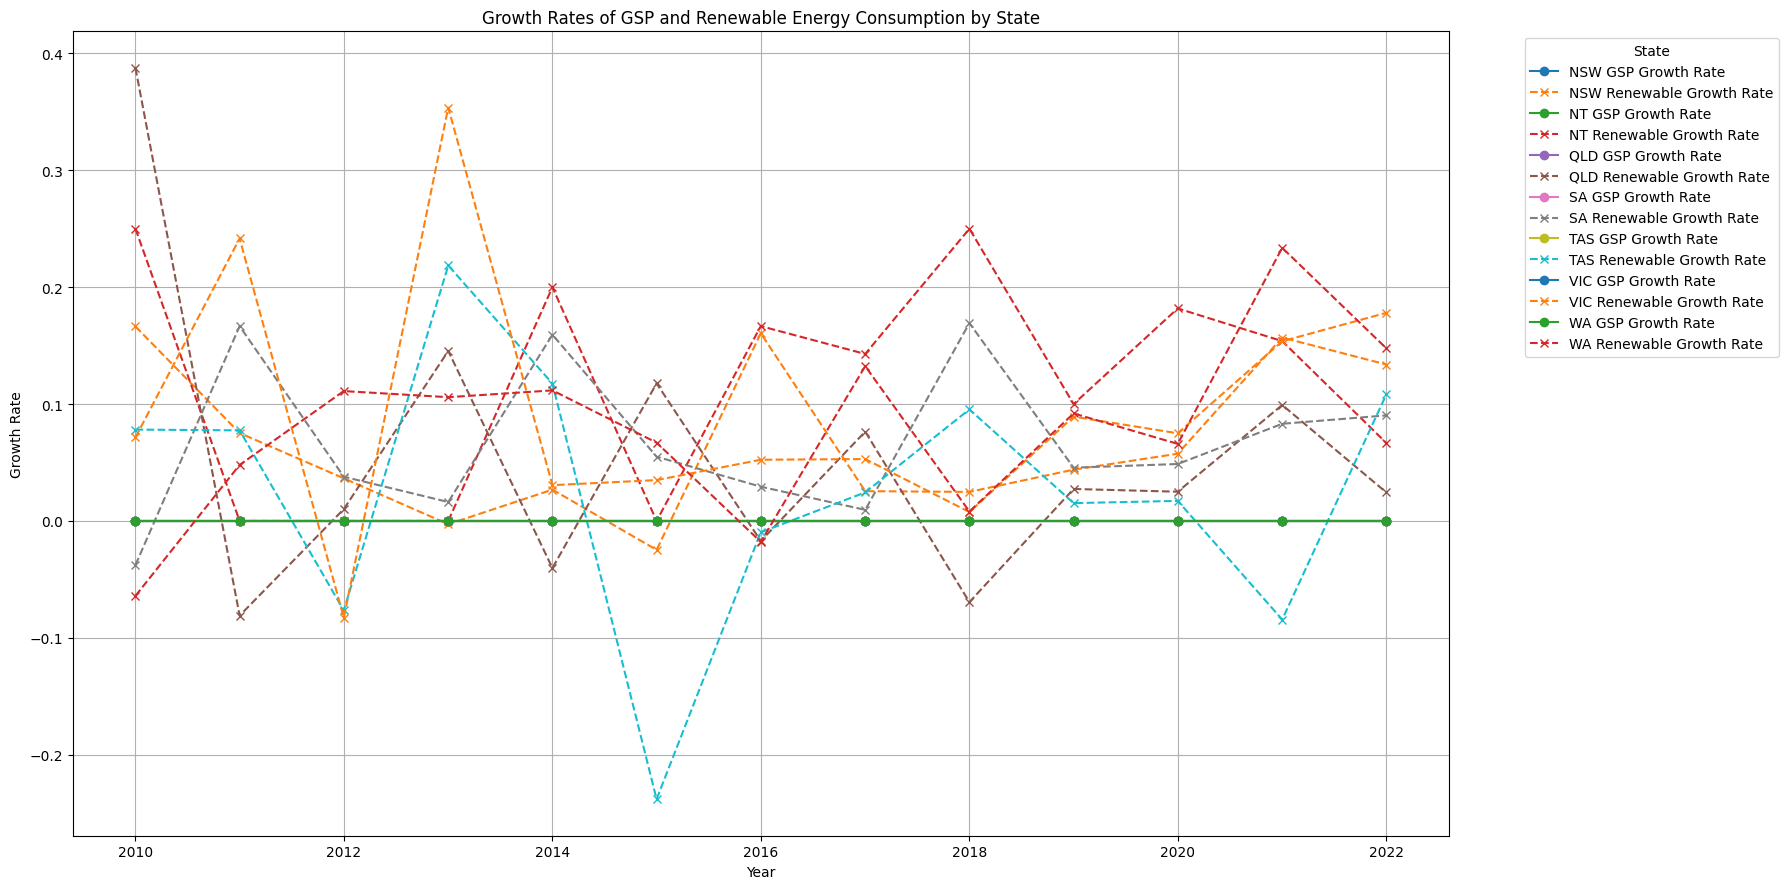

In [ ]:
# SQL query to calculate the growth rates of GSP and renewable energy consumption
query = """
SELECT
    Year,
    State,
    (GSP_million - LAG(GSP_million, 1) OVER (PARTITION BY State ORDER BY Year)) / LAG(GSP_million, 1) OVER (PARTITION BY State ORDER BY Year) AS GSP_Growth_Rate,
    (Renewables_PJ - LAG(Renewables_PJ, 1) OVER (PARTITION BY State ORDER BY Year)) / LAG(Renewables_PJ, 1) OVER (PARTITION BY State ORDER BY Year) AS Renewable_Growth_Rate
FROM (
    SELECT
        *,
        `GSP ($ million)` AS GSP_million,
        `Renewables (PJ)` AS Renewables_PJ
    FROM
        AUS_energy
)
"""

# Execute the query and load the result into a DataFrame
growth_rate_df = pd.read_sql_query(query, conn)

# Convert the Year column to a datetime format for better plotting
growth_rate_df['Year'] = pd.to_datetime(growth_rate_df['Year'], format='%Y-%y')

# Plot the growth rates of GSP and renewable energy consumption for each state
plt.figure(figsize=(18, 9))

# Iterate through each state and plot its growth rates
for state, data in growth_rate_df.groupby('State'):
    plt.plot(data['Year'], data['GSP_Growth_Rate'], label=f'{state} GSP Growth Rate', linestyle='-', marker='o')
    plt.plot(data['Year'], data['Renewable_Growth_Rate'], label=f'{state} Renewable Growth Rate', linestyle='--', marker='x')

plt.title('Growth Rates of GSP and Renewable Energy Consumption by State')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.grid(True)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

10. **Examine and plot how the efficiency of energy use, measured as energy consumption per
capita or per GSP, relates to population growth and economic development over time in
each state.**

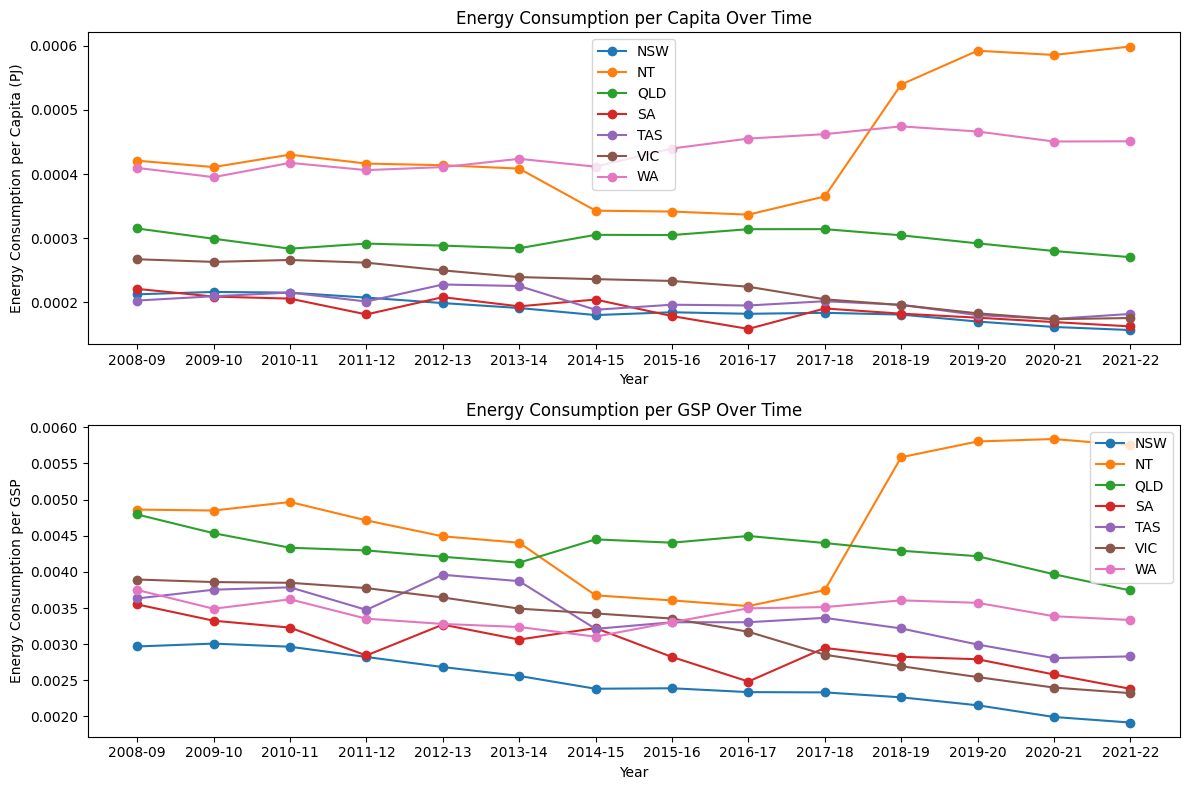

In [ ]:
# SQL query to retrieve necessary data
query = """
SELECT
    Year,
    State,
    Population,
    `GSP ($ million)` AS GSP,
    `Coal (PJ)` + `Oil (PJ)` + `Gas (PJ)` + `Renewables (PJ)` AS Total_Energy_Consumption
FROM
    AUS_energy
"""

# Execute the query and load the result into a DataFrame
df = pd.read_sql_query(query, conn)
# Calculate energy consumption per capita
df['Energy_Consumption_Per_Capita'] = df['Total_Energy_Consumption'] / df['Population']

# Calculate energy consumption per GSP
df['Energy_Consumption_Per_GSP'] = df['Total_Energy_Consumption'] / df['GSP']

# Plot the relationships
plt.figure(figsize=(12, 8))

# Plot energy consumption per capita vs. year
#used copilot, gemini and CHATGPT ai to divide these graphs to two subplots
plt.subplot(2, 1, 1)
for state, data in df.groupby('State'):
    plt.plot(data['Year'], data['Energy_Consumption_Per_Capita'], label=state, marker='o')
plt.title('Energy Consumption per Capita Over Time')
plt.xlabel('Year')
plt.ylabel('Energy Consumption per Capita (PJ)')
plt.legend()

# Plot energy consumption per GSP vs. year
plt.subplot(2, 1, 2)
for state, data in df.groupby('State'):
    plt.plot(data['Year'], data['Energy_Consumption_Per_GSP'], label=state, marker='o')
plt.title('Energy Consumption per GSP Over Time')
plt.xlabel('Year')
plt.ylabel('Energy Consumption per GSP')
plt.legend()

plt.tight_layout()
plt.show()

**Interpretation and Conclusion:**

*Main Insights*: Through the data analysis, several key insights were obtained:

       * Total energy consumption varied among states, with some states exhibiting higher consumption levels compared to others.
       * Renewable energy consumption showed an increasing trend over the years, indicating a shift towards sustainable energy sources.
       * Energy productivity and intensity varied across states and years, reflecting differences in economic development and energy efficiency.
       * Per capita energy consumption highlighted disparities in energy usage patterns among states.

*Limitations and Possible Improvements*:

* One limitation is the availability and quality of data. Incomplete or inaccurate data could affect the accuracy of the analysis.
* The analysis focused mainly on aggregate trends and did not delve into causality or predictive modeling.
* Possible improvements include incorporating more granular data, such as sector-specific energy consumption, and performing more advanced statistical analyses to uncover underlying patterns

*Usability and Effectiveness of Python Notebooks as Reports*:

* Python notebooks offer a highly effective platform for conducting data analysis and documenting the process.
* The combination of Markdown text cells and code cells allows for clear explanation of analysis steps, results, and interpretations. * Notebooks facilitate reproducibility by enabling others to execute the code and replicate the analysis.
* Overall, Python notebooks serve as comprehensive and interactive reports, enhancing collaboration and communication in data-driven projects.

**Functionality:**

     *preprocess_energy_data (df, energy_columns) Function:*
        * Converts energy columns to numeric values for analysis.
        * Handles errors by coercing non-numeric values to NaN.
        * Essential for ensuring data consistency and correctness.

     *Code Structure:*
        * The analysis starts with connecting to the database and loading the data.
        * Data preprocessing is performed to ensure all energy consumption values are numeric.
        * Various SQL queries are used to fetch specific data subsets for analysis.
        * Grouped and aggregated data is visualized using matplotlib.



**Rationale:**

     *Choice of pivot vs. groupby:*
        * groupby is used for aggregation based on multiple columns (e.g., Year and State).
        * pivot is used to reshape data for easier plotting of multiple lines (one for each state).
        * These methods facilitate clear and informative visualizations that align with the analysis objectives.

     *Visualization Choices:*
        * Bar plots are used for comparing total values across states or fuel types.
        * Line plots are used for analyzing trends over time.
        * These visualization methods are chosen for their effectiveness in conveying the analyzed trends and comparisons.

**Reflection on the Use of Gen AI**:
The use of generative AI assistants like Copilot, Gemini, and ChatGPT has been instrumental in streamlining the data analysis process and enhancing productivity. These AI tools have proven to be valuable resources, providing code suggestions, insights, and alternative approaches to problem-solving. One of the key benefits of using Gen AI was the ability to generate code snippets quickly and efficiently.

Additionally, Copilot AI helped in fixing errors related to data manipulation techniques like grouping, aggregating, and pivoting, which were crucial for extracting meaningful insights from the dataset. Gemini AI played a significant role in optimizing data visualization by suggesting appropriate color schemes and figure sizes for various plots. This not only improved the aesthetic appeal of the visualizations but also ensured that the plots were legible and easy to interpret. ChatGPT AI provided valuable guidance in structuring the analysis and ensuring that all the required aspects were covered comprehensively. However, it is important to note that while Gen AI assistants can significantly enhance productivity and provide valuable insights, it is crucial to critically evaluate and validate their suggestions to ensure their relevance and accuracy in the context of the analysis.

The team exercised due diligence in reviewing and verifying the AI-generated code and recommendations before incorporating them into the final analysis. Overall, the integration of Gen AI into the data analysis process has been a positive experience, enabling efficient problem-solving, streamlining code development, and fostering a collaborative learning environment.

The well-advised use of these AI tools, combined with critical thinking and domain expertise, has contributed to the successful completion of the Australian energy dataset analysis.